In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras.layers import LSTM, Dense, Dropout
import yfinance as yf

In [2]:
# Download stock data
company = 'AAPL'  # Apple Inc.
data = yf.download(company, start='2015-01-01', end='2024-01-01')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


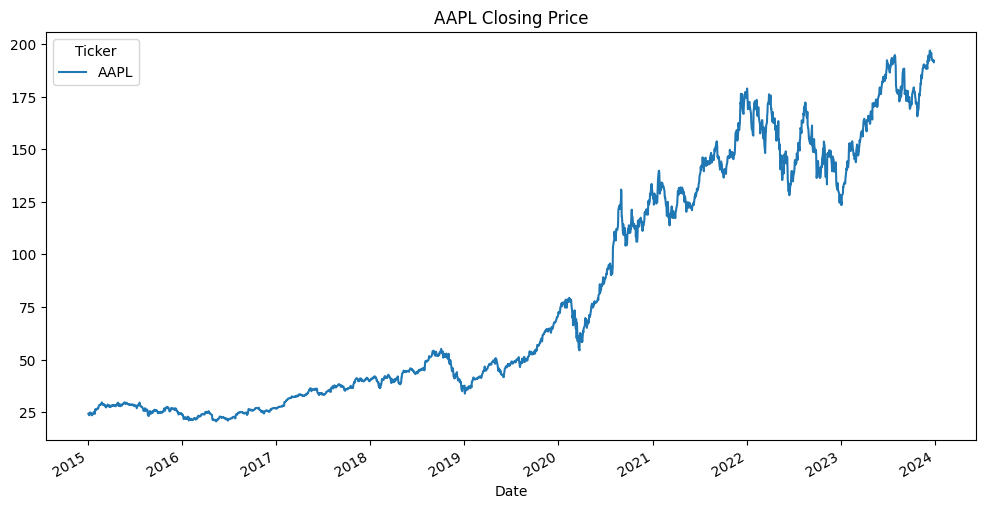

In [3]:
# Plot stock price
data['Close'].plot(figsize=(12,6), title=f'{company} Closing Price')
plt.show()

In [4]:
# Data Preprocessing
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data[['Close']])

In [5]:
# Prepare dataset for LSTM
sequence_length = 60  # 60 days window
X, y = [], []
for i in range(len(data_scaled) - sequence_length):
    X.append(data_scaled[i:i+sequence_length])
    y.append(data_scaled[i+sequence_length])
X, y = np.array(X), np.array(y)

In [6]:
# Split into train and test
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [7]:
# Build LSTM Model
model = Sequential([
    Input(shape=(X_train.shape[1], 1)),  # Explicit Input layer
    LSTM(50, return_sequences=True),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

In [8]:
# Train Model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0253 - val_loss: 0.0022
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0012 - val_loss: 0.0019
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 8.1660e-04 - val_loss: 0.0020
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 9/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 10/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 8.7725e-04 - val_loss: 0.0034
Epoch 11/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 8.8487e-04 - val_loss: 9.5675e-04
Epoch 12/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/

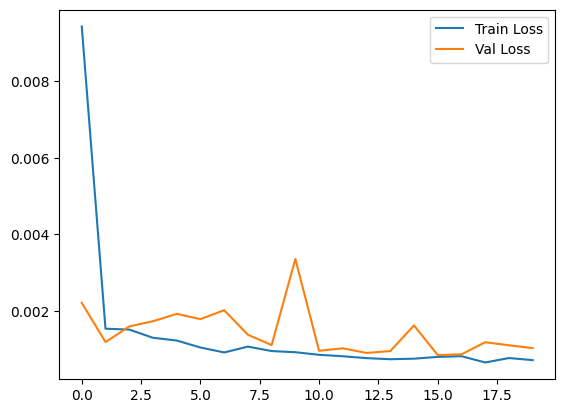

In [9]:
# Plot training history
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()

In [10]:
# Predictions
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


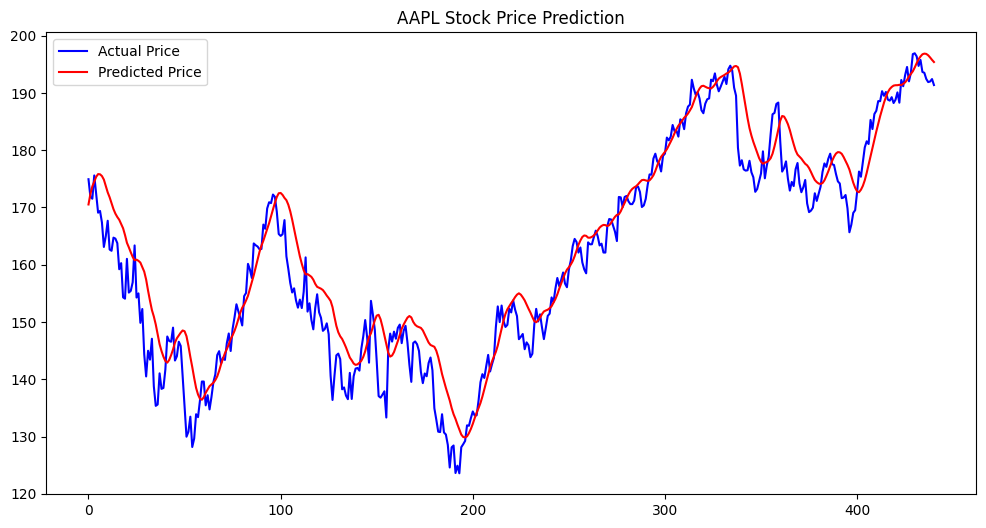

In [11]:
# Plot predictions
plt.figure(figsize=(12,6))
plt.plot(y_test_inv, label='Actual Price', color='blue')
plt.plot(y_pred_inv, label='Predicted Price', color='red')
plt.legend()
plt.title(f'{company} Stock Price Prediction')
plt.show()